<a href="https://colab.research.google.com/github/siddharth0517/News-Article-Classification-using-Naive-Bayes/blob/main/News_Article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Article Classification using Naive Bayes

**1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**2. Importing Dataset**

In [2]:
Dataset = pd.read_csv('train.csv')

In [3]:
Dataset.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


**3. Cleaning The Dataset**

In [4]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)

    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    return " ".join(tokens)


Dataset['clean_text'] = Dataset['Description'].apply(preprocess_text)


**4. Splitting The Datset**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset['clean_text'], Dataset['Class Index'], test_size=0.2, random_state=42)


**5. Feature Extraction (TF-IDF Vectorization)**

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)


**6. Building Model**

In [7]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_tfidf, y_train)


MultinomialNB()

**7. Predicting Model**

In [8]:
y_pred = model.predict(X_test_tfidf)

**8. Model Evaluation**

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))



Accuracy: 0.8824
              precision    recall  f1-score   support

           1       0.89      0.88      0.88      5956
           2       0.93      0.97      0.95      6058
           3       0.84      0.84      0.84      5911
           4       0.86      0.84      0.85      6075

    accuracy                           0.88     24000
   macro avg       0.88      0.88      0.88     24000
weighted avg       0.88      0.88      0.88     24000



**9. Confusion Matrix**

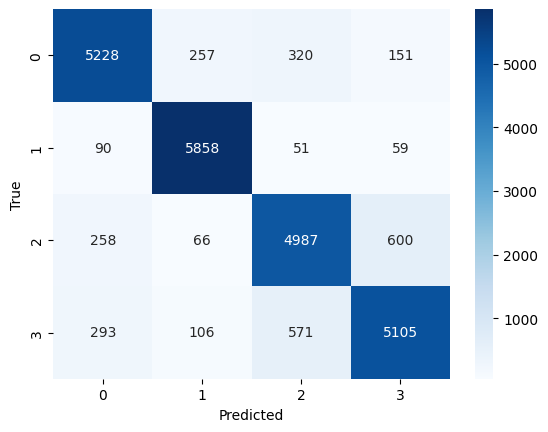

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
import joblib

joblib.dump(model, 'naive_bayes_model.pkl')


joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']